In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [22]:
df=pd.read_csv("airfoil_self_noise.dat",sep="\t",header=None)

In [23]:
df

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [24]:
df.columns=["Fequency","Angle of attack","Chord length","Free-stream velocity","Suction side","pressure level"]

In [25]:
df

,Fequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [26]:
df.isnull().sum()

Fequency                0
Angle of attack         0
Chord length            0
Free-stream velocity    0
Suction side            0
pressure level          0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Chord length'>

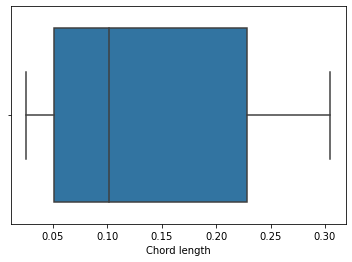

In [27]:

sns.boxplot(df.iloc[:,2])

In [28]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax

,Fequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
0,0.030303,0.000000,1.000000,1.000000,0.039005,0.606829
1,0.040404,0.000000,1.000000,1.000000,0.039005,0.580238
2,0.053030,0.000000,1.000000,1.000000,0.039005,0.600181
3,0.070707,0.000000,1.000000,1.000000,0.039005,0.643790
4,0.090909,0.000000,1.000000,1.000000,0.039005,0.640333
...,...,...,...,...,...,...
1498,0.116162,0.702703,0.272727,0.199495,0.904111,0.183051
1499,0.148990,0.702703,0.272727,0.199495,0.904111,0.156194
1500,0.191919,0.702703,0.272727,0.199495,0.904111,0.085729
1501,0.242424,0.702703,0.272727,0.199495,0.904111,0.075624


In [29]:
df_minmax.isnull().sum()

Fequency                0
Angle of attack         0
Chord length            0
Free-stream velocity    0
Suction side            0
pressure level          0
dtype: int64

In [30]:
X=df_minmax.iloc[:,0:-1]
Y=df_minmax.iloc[:,-1]

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [150]:
import pickle
pickle.dump(Reg, open('model.pkl', 'wb'))

In [151]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

array([0.66880615, 0.38415347, 0.69439856, 0.34619891, 0.5366121 ,
       0.55351288, 0.49516683, 0.69804412, 0.58422071, 0.33705317,
       0.62720604, 0.54566226, 0.77836835, 0.35866957, 0.51869519,
       0.39731085, 0.51084303, 0.6986635 , 0.61991672, 0.54878277,
       0.51287394, 0.50317747, 0.78859803, 0.72604116, 0.38045861,
       0.52298529, 0.773716  , 0.54400068, 0.36743862, 0.69288011,
       0.63529519, 0.57634486, 0.66706546, 0.47587801, 0.5998622 ,
       0.78888302, 0.57276015, 0.74843763, 0.66764837, 0.56489746,
       0.70109417, 0.69451763, 0.50022971, 0.55949262, 0.60188939,
       0.45966722, 0.712001  , 0.7245452 , 0.7088462 , 0.73481755,
       0.73115945, 0.64688031, 0.71642995, 0.67051398, 0.44550853,
       0.46125421, 0.28483365, 0.66545184, 0.62832693, 0.42047959,
       0.49559132, 0.49397687, 0.65473362, 0.24069652, 0.53917052,
       0.51292101, 0.58751004, 0.57911681, 0.28877632, 0.34675412,
       0.54953828, 0.47441954, 0.3667931 , 0.50440142, 0.36023

In [ ]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/00547/


# https://archive.ics.uci.edu/ml/machine-learning-databases/00547/